In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat
from skimage import color, io
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix



In [3]:
def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

x_train, y_train = load_data("/kaggle/input/svhndataset/train_32x32.mat")
x_test, y_test = load_data("/kaggle/input/svhndataset/test_32x32.mat")

In [4]:
# Transpose image arrays
x_train = x_train.transpose((3, 0, 1, 2))
x_test = x_test.transpose((3, 0, 1, 2))

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
# One-hot encode the labels
y_train = to_categorical(y_train % 10, 10)
y_test = to_categorical(y_test % 10, 10)

In [8]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)
datagen.fit(x_train)


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), 
                    validation_data=(x_test, y_test),
                    epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 100s 85ms/step - accuracy: 0.3383 - loss: 1.8815 - val_accuracy: 0.8556 - val_loss: 0.5276
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 97s 84ms/step - accuracy: 0.7376 - loss: 0.8426 - val_accuracy: 0.8736 - val_loss: 0.4534
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 98s 85ms/step - accuracy: 0.7934 - loss: 0.6741 - val_accuracy: 0.8999 - val_loss: 0.3559
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 97s 85ms/step - accuracy: 0.8207 - loss: 0.5956 - val_accuracy: 0.9092 - val_loss: 0.3283
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 97s 84ms/step - accuracy: 0.8458 - loss: 0.5069 - val_accuracy: 0.9188 - val_loss: 0.2926
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 97s 84ms/step - accuracy: 0.8528 - loss: 0.4884 - val_accuracy: 0.9222 - val_loss: 0.2844
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 97s 84ms/step - accuracy: 0.8589 - loss: 0.4790 - val_accuracy: 0.9227 - val_loss: 0.2814
Epoch 9/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 97s 84ms/step - accuracy: 0.8648 - loss: 0.4

814/814 - 7s - 9ms/step - accuracy: 0.9285 - loss: 0.2645
Test Accuracy: 0.9285
814/814 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1744
           1       0.95      0.96      0.95      5099
           2       0.95      0.95      0.95      4149
           3       0.87      0.92      0.90      2882
           4       0.94      0.94      0.94      2523
           5       0.95      0.90      0.92      2384
           6       0.94      0.89      0.91      1977
           7       0.94      0.93      0.93      2019
           8       0.92      0.88      0.90      1660
           9       0.87      0.92      0.89      1595

    accuracy                           0.93     26032
   macro avg       0.92      0.92      0.92     26032
weighted avg       0.93      0.93      0.93     26032



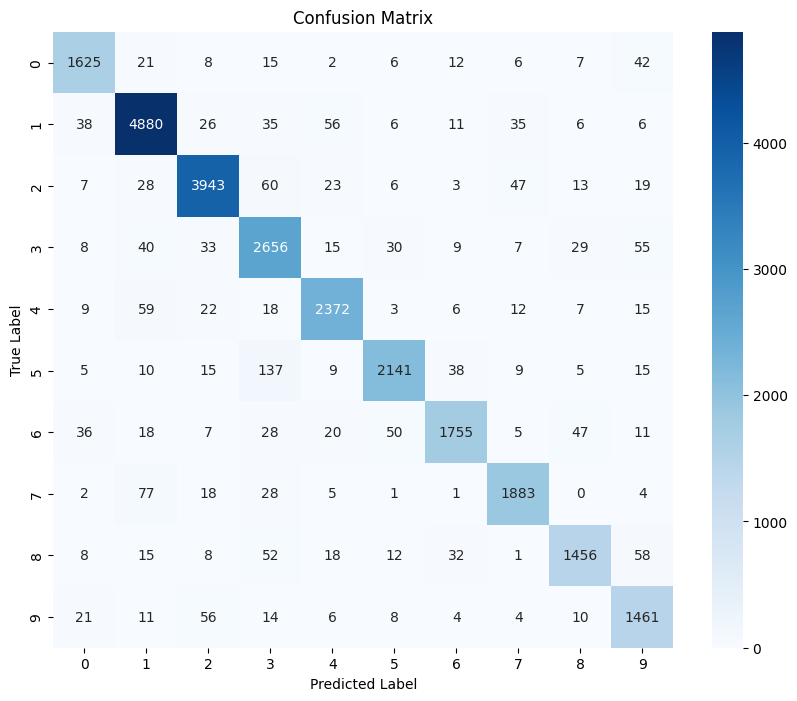

In [12]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate classification report and confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()